In [1]:
library(rsample)   # data splitting 
library(ggplot2)   # plotting
library(earth)     # fit MARS models
library(caret)     # automating the tuning process
library(vip)       # variable importance
library(pdp)       # variable relationships
library(plot3D)
library("AmesHousing")
library("pls")
library("glmnet")
library("kableExtra")

In [30]:
# loads individuals run results data set
results <- read.table('https://raw.githubusercontent.com/edigley/spif/master/results/farsite_individuals_runtime_jonquera.txt', header=T)
ds <- subset(results, select=c(paste("p", 0:9, sep=""), "runtime", "maxRSS"))

# extract only the main features
params <- c("p_1h", "p_10h", "p_100h", "p_herb", "p_1000h", "p_ws", "p_wd", "p_th", "p_hh", "p_adj")
colnames(ds) <- c(params, "runtime", "maxRSS")

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

,nprune,degree
22,2,2


Selected 2 of 19 terms, and 2 of 10 predictors
Termination condition: Reached nk 21
Importance: p_ws, p_hh, p_1h-unused, p_10h-unused, p_100h-unused, ...
Number of terms at each degree of interaction: 1 0 1
GCV 16523383    RSS 14838221842    GRSq 0.1721543    RSq 0.1767268

Call: earth(x=data.frame[905,10], y=c(690,1157,1713...), keepxy=TRUE, degree=2,
            nprune=2)

                        coefficients
(Intercept)                591.61514
h(p_ws-10) * h(45-p_hh)     72.67214

Selected 2 of 19 terms, and 2 of 10 predictors
Termination condition: Reached nk 21
Importance: p_ws, p_hh, p_1h-unused, p_10h-unused, p_100h-unused, ...
Number of terms at each degree of interaction: 1 0 1
GCV 16523383    RSS 14838221842    GRSq 0.1721543    RSq 0.1767268

Warning message:
“Ignoring unknown aesthetics: shape”

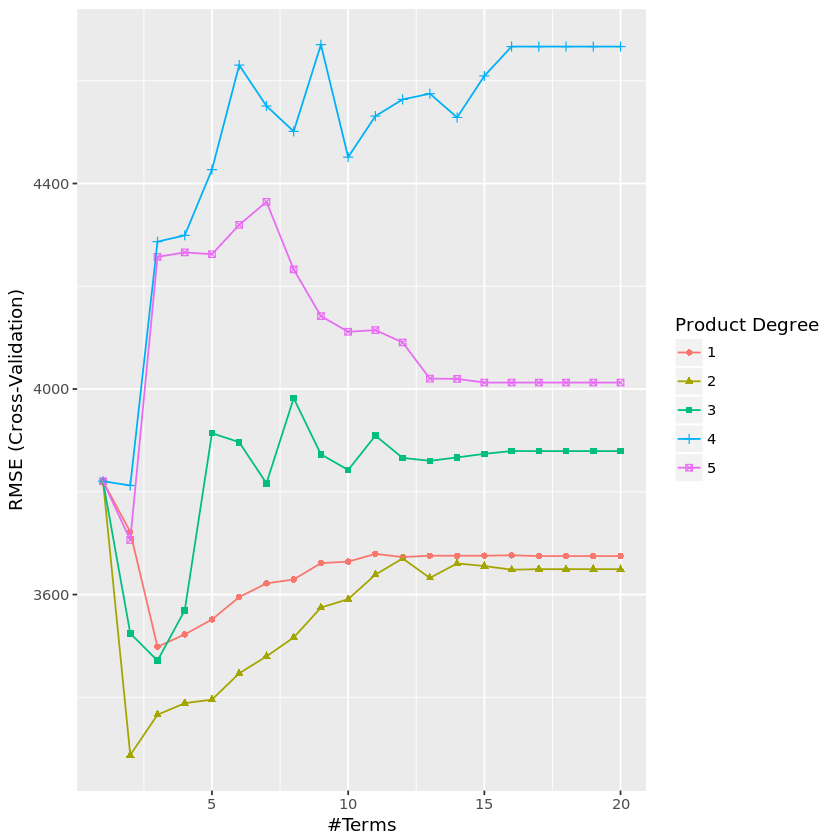

In [31]:
# generates a model for individuals' runtime
dsRuntime <- subset(ds, select=c(params, "runtime"))

set.seed(1984)
dsRuntime_split <- initial_split(dsRuntime, prop = .9, strata = "runtime")
dsRuntime_train <- training(dsRuntime_split)
dsRuntime_test  <- testing(dsRuntime_split)
hyper_grid <- expand.grid(
  degree = 1:5, 
  nprune = seq(1, 20, length.out = 20) %>% floor()
)
marsRuntime <- train(
  x = subset(dsRuntime_train, select = -runtime),
  y = dsRuntime_train$runtime,
  method = "earth",
  metric = "RMSE",
  trControl = trainControl(method = "cv", number = 10),
  tuneGrid = hyper_grid
)
marsRuntime$bestTune
marsRuntime$finalModel
summary(marsRuntime)
ggplot(marsRuntime)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

,nprune,degree
24,4,2


Selected 4 of 20 terms, and 2 of 10 predictors
Termination condition: Reached nk 21
Importance: p_ws, p_hh, p_1h-unused, p_10h-unused, p_100h-unused, ...
Number of terms at each degree of interaction: 1 2 1
GCV 1.99507e+11    RSS 1.771782e+14    GRSq 0.4488134    RSq 0.4579213

Call: earth(x=data.frame[905,10], y=c(492400,801400...), keepxy=TRUE, degree=2,
            nprune=4)

                       coefficients
(Intercept)               708675.97
h(23-p_ws)                -28569.56
h(p_hh-49)                 -7088.19
h(p_ws-8) * h(49-p_hh)      6003.81

Selected 4 of 20 terms, and 2 of 10 predictors
Termination condition: Reached nk 21
Importance: p_ws, p_hh, p_1h-unused, p_10h-unused, p_100h-unused, ...
Number of terms at each degree of interaction: 1 2 1
GCV 1.99507e+11    RSS 1.771782e+14    GRSq 0.4488134    RSq 0.4579213

Warning message:
“Ignoring unknown aesthetics: shape”

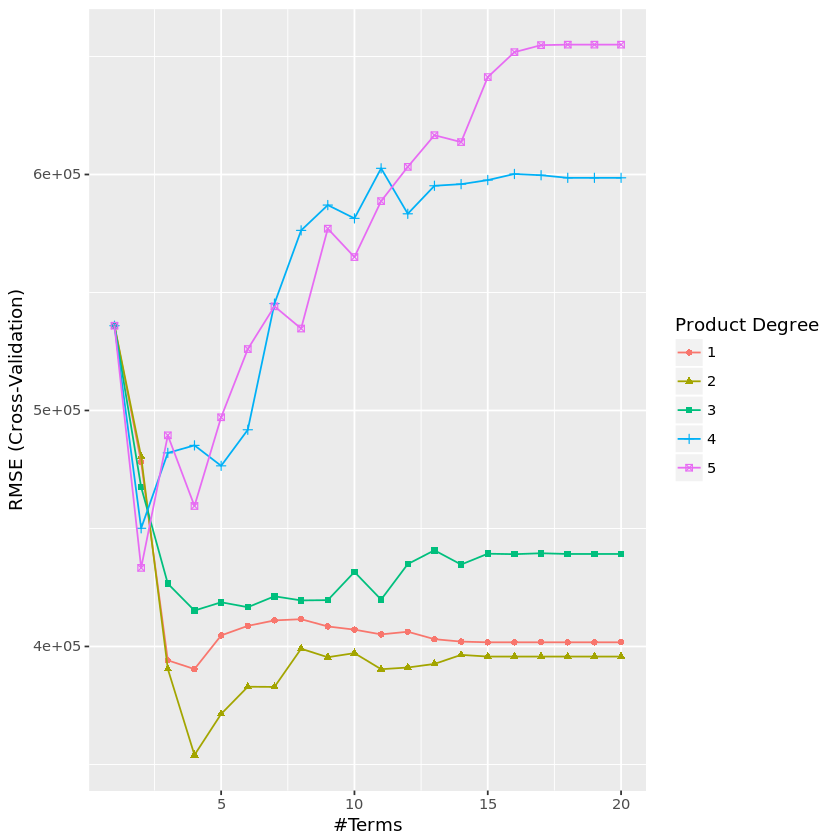

In [32]:
# generates a model for individuals memory's Resident Set Size (RSS)
dsMaxRSS <- subset(ds, select=c(params, "maxRSS"))

set.seed(7303)
dsMaxRSS_split <- initial_split(dsMaxRSS, prop = .9, strata = "maxRSS")
dsMaxRSS_train <- training(dsMaxRSS_split)
dsMaxRSS_test  <- testing(dsMaxRSS_split)
hyper_grid <- expand.grid(
  degree = 1:5, 
  nprune = seq(1, 20, length.out = 20) %>% floor()
)
marsMaxRSS <- train(
  x = subset(dsMaxRSS_train, select = -maxRSS),
  y = dsMaxRSS_train$maxRSS,
  method = "earth",
  metric = "RMSE",
  trControl = trainControl(method = "cv", number = 10),
  tuneGrid = hyper_grid
)
marsMaxRSS$bestTune
marsMaxRSS$finalModel
summary(marsMaxRSS)
ggplot(marsMaxRSS)

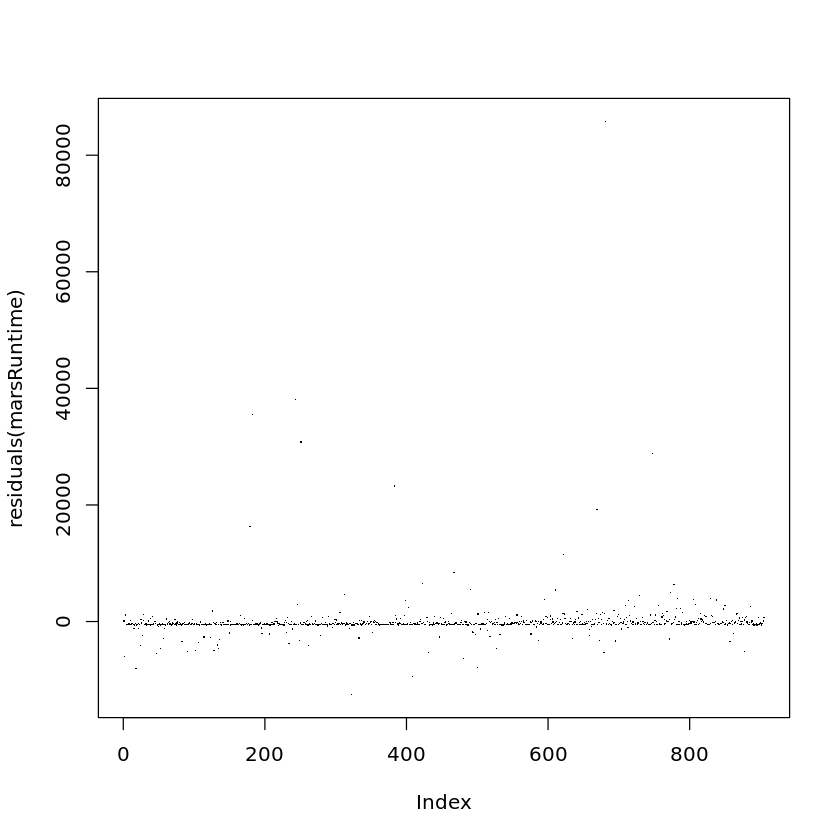

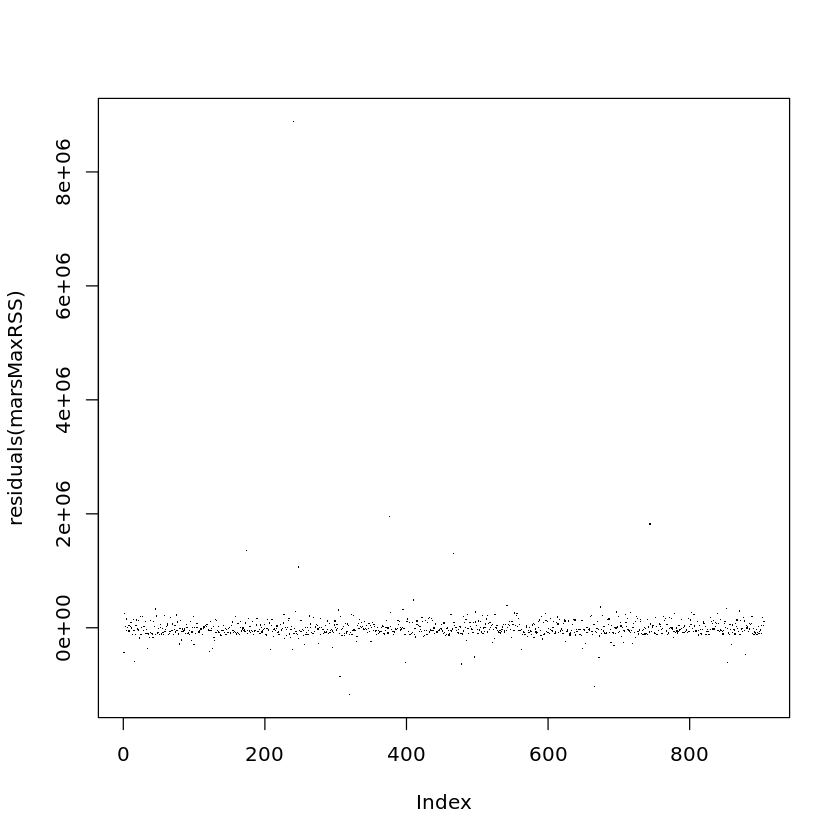

In [29]:
plot(residuals(marsRuntime), pch=".")
plot(residuals(marsMaxRSS),  pch=".")